# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [30]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#start with an empty list for each 
city_id = []
city_name = []
country = []
long= []
lat= []
temp = []
humidity=[]
clouds= []
wind_speed= []

# Loop through cities
for city in cities:
    
    # Get the JSON response from the OpenWeather API

    response = requests.get(query_url + city).json()
    
    try:
        current_city_id=response['id']
        city_id.append(current_city_id)
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        long.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
    
        #display city info at each iteration
        print(f"The city of {city} has City ID: {current_city_id}")

    #when info does not exist       
    except KeyError:
        
        print("That information requested does not exist in this record....")


The city of lang son has City ID: 1576633
The city of itarema has City ID: 3393692
That information requested does not exist in this record....
The city of rikitea has City ID: 4030556
The city of tasiilaq has City ID: 3424607
The city of jamestown has City ID: 5122534
The city of bubaque has City ID: 2374583
The city of ushuaia has City ID: 3833367
The city of broken hill has City ID: 2173911
The city of kodiak has City ID: 5866583
The city of victoria has City ID: 1819729
The city of molochnoye has City ID: 525585
The city of coihaique has City ID: 3894426
The city of mataura has City ID: 6201424
The city of cherskiy has City ID: 2126199
The city of dikson has City ID: 1507390
The city of barrow has City ID: 5880054
The city of narsaq has City ID: 3421719
The city of teknaf has City ID: 1185095
The city of nioro has City ID: 2412408
The city of catu has City ID: 3466641
The city of arandis has City ID: 3358670
The city of sabang has City ID: 1214026
The city of chunskiy has City ID: 

The city of olafsvik has City ID: 3414079
The city of providencia has City ID: 3991622
The city of airai has City ID: 1651810
The city of nome has City ID: 5870133
The city of yerbogachen has City ID: 2012956
The city of tkibuli has City ID: 611584
The city of kralendijk has City ID: 3513563
The city of garowe has City ID: 58933
The city of gataivai has City ID: 4035310
The city of luanda has City ID: 2240449
The city of ugoofaaru has City ID: 1337619
The city of thaba-tseka has City ID: 1106835
The city of beringovskiy has City ID: 2126710
The city of dingle has City ID: 1714733
The city of ostrovnoy has City ID: 556268
The city of gryfice has City ID: 3098201
The city of nikolskoye has City ID: 546105
The city of krasnoye has City ID: 704277
The city of moba has City ID: 7341918
The city of torbay has City ID: 6167817
That information requested does not exist in this record....
That information requested does not exist in this record....
The city of nabire has City ID: 1634614
That i

The city of la cruz has City ID: 4002745
The city of nizhniy odes has City ID: 520552
The city of grand-santi has City ID: 3381538
The city of kahului has City ID: 5847411
The city of poum has City ID: 2138555
The city of santa cruz has City ID: 3904906
The city of georgiyevka has City ID: 1524243
The city of issoire has City ID: 3012664
The city of point pleasant has City ID: 5102796
The city of buala has City ID: 2109528
The city of nador has City ID: 2541479
The city of anzio has City ID: 6542092
The city of halifax has City ID: 6324729
The city of mandeville has City ID: 3489577
The city of yumen has City ID: 1528998
The city of sechura has City ID: 3691954
The city of aripuana has City ID: 3665202
The city of maragheh has City ID: 140889
The city of lufilufi has City ID: 4035249
The city of san andres has City ID: 3670218
That information requested does not exist in this record....
The city of virginia beach has City ID: 4791259
The city of port augusta has City ID: 2063056
The ci

The city of gazimurskiy zavod has City ID: 2024122
The city of sistranda has City ID: 3139597
The city of faya has City ID: 110690
The city of frederico westphalen has City ID: 3462956
The city of santa cruz del sur has City ID: 3537840
The city of mount gambier has City ID: 2156643
The city of hambantota has City ID: 1244926
The city of leeuwarden has City ID: 2751792
The city of mizan teferi has City ID: 330534
The city of riyadh has City ID: 108410
The city of wembley has City ID: 2058682
The city of flinders has City ID: 6255012
The city of larsnes has City ID: 3148133
The city of puerto madero has City ID: 3520989
The city of cap-aux-meules has City ID: 5915327
The city of burns lake has City ID: 5911745
The city of ulladulla has City ID: 2145554
That information requested does not exist in this record....
The city of kutum has City ID: 371745
The city of bulgan has City ID: 2032201
That information requested does not exist in this record....
The city of santa barbara has City ID:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
cities_df = pd.DataFrame({"City ID": city_id, "City": city_name, "Country": country, "Lat": lat, "Long": long,
                         "Temperature": temp, "Humidity": humidity, "Clouds": clouds,
                         "Wind Speed": wind_speed})
cities_df.head()

,City ID,City,Country,Lat,Long,Temperature,Humidity,Clouds,Wind Speed
0,1576633,Lang Son,VN,21.8333,106.7333,15.76,88,100,4.65
1,3393692,Itarema,BR,-2.9248,-39.9167,26.14,82,100,4.33
2,4030556,Rikitea,PF,-23.1203,-134.9692,23.83,74,89,8.58
3,3424607,Tasiilaq,GL,65.6145,-37.6368,9.09,47,42,4.16
4,5122534,Jamestown,US,42.0970,-79.2353,14.16,71,1,4.12


In [41]:
#export to .csv
cities_df.to_csv(output_data_file, index=False, header=True)

count_row = cities_df.shape[0]
print(count_row)

578


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
new_cities_df = cities_df.loc[cities_df['Humidity'] <= 100]

count_row = new_cities_df.shape[0]
print (count_row)

#same number as original data frame

578


In [45]:
#  Get the indices of cities that have humidity over 100%.
#there are none
no_cities_df = cities_df.loc[cities_df['Humidity'] > 100]
no_cities_df.head()

,City ID,City,Country,Lat,Long,Temperature,Humidity,Clouds,Wind Speed


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

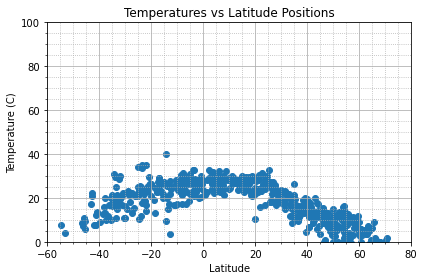

FileNotFoundError: [Errno 2] No such file or directory: 'Images/lat_v_temp.png'

<Figure size 432x288 with 0 Axes>

In [46]:
#plot of latitude vs temp
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]


plt.scatter(x_values,y_values)
plt.title('Temperatures vs Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Images/lat_v_temp.png")

## Latitude vs. Humidity Plot

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression